In [1]:
from docx import Document

# Load the Word document
doc = Document('data.docx')

# Initialize an empty list to store the split information
split_data = []

# Iterate through each paragraph in the document
for para in doc.paragraphs:
    # Get the text and split it by '|'
    split_paragraph = para.text.split('|')
    
    # Append each split part to the array
    split_data.extend(split_paragraph)

split_data = split_data[3:]

In [2]:
import ast

def parse_2d_array_from_string(data_string):
    # Safely evaluate the string to convert it into a Python object (list)
    return ast.literal_eval(data_string)
control_points = split_data[0:15]
weights = split_data[29:-1]

# Parse each element in split_data into a 2D array
weights = [parse_2d_array_from_string(data) for data in weights]
control_points = [parse_2d_array_from_string(data) for data in control_points]


In [3]:
len(weights)

30

In [4]:
len(control_points)

15

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


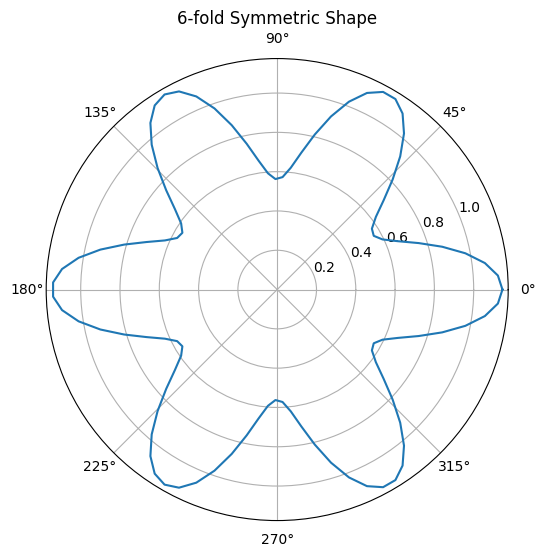

In [5]:
# %matplotlib inline
%pylab inline
import scipy
from pyiga import bspline, assemble, vform, geometry, vis, solvers
import numpy as np
import matplotlib.pyplot as plt
def cal_c(r, a, L0):
    return np.sqrt(2)*np.sqrt(np.pi*(3+3*r**2+2*r)*a*L0)/(np.pi*(3+3*r**2+2*r))
def superformula(theta, r, d, n, a, L0):
    c = cal_c(r,a,L0)
    return c*((1+r)-d*(-1)**((n+2)/2)*(r-1)*np.cos(n*theta))
d = 0.8
r = 0.4
n = 6
a = 0.1
L0 = 25
def polar_to_cartesian(result, theta):
    x = result * np.cos(theta)
    y = result * np.sin(theta)
    return (x,y)
theta_values = np.linspace(0, 2 * np.pi, 100)
result = superformula(theta_values, r, d, n, a, L0)
plt.figure(figsize=(6, 6))
plt.polar(theta_values, result)
plt.title(f"{n}-fold Symmetric Shape")
plt.show()
# print(polar_to_cartesian(result, theta_values))

(1, 64)
(65,)


(1, 64)
(1, 64)
(64, 2)
(1, 64)
(64,)
(64,)


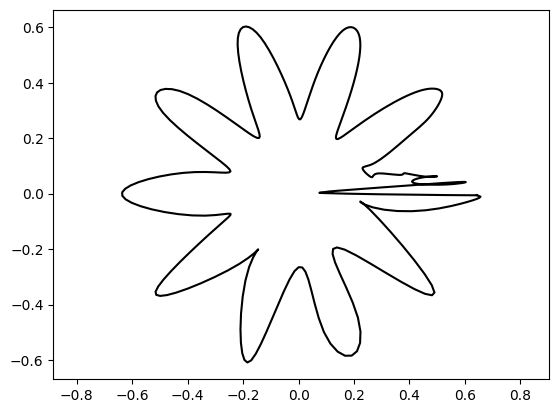

In [16]:
from pyiga.geometry import *
from pyiga import approx, bspline
n = 1
ctlpts = np.array(control_points[n])
weight = np.array(weights[n])
print(weight.shape)
# ctlpts = np.hstack([ctlpts, ctlpts[:, 0].reshape(2, 1)])
# weight = np.append(weight, weight[0][0])
print(weight.shape)
n_kv = 61
kv = bspline.make_knots(3, 0.0, 1.0, n_kv)
coeff = ctlpts.transpose()
grid = (np.linspace(0.0, 1.0, 100),)
print(coeff.shape)
print(weight.shape)
weight = weight.transpose().reshape(64)
print(weight.shape)
N = tuple(kv.numdofs for kv in (kv,))
# print(N)
nurbs = NurbsFunc((kv,), coeff.copy(), weights=weight)
vals = nurbs.grid_eval(grid)

vis.plot_geo(nurbs,res=500, linewidth=None, color='black')
axis('equal');


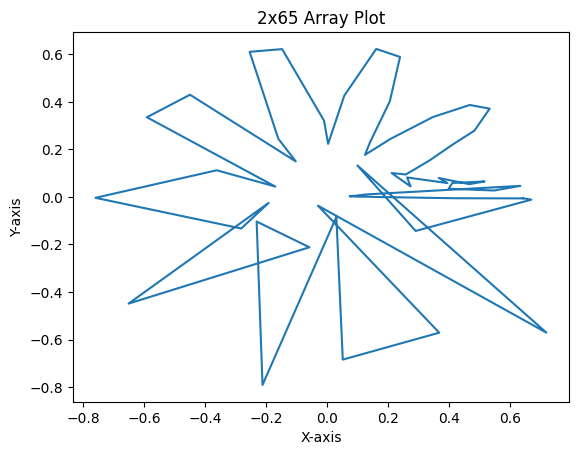

In [17]:
# Plot the data
plt.plot(ctlpts[0], ctlpts[1])

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2x65 Array Plot')

# Show the plot
plt.show()